# Ejercicios Aprendizaje Automático
## Practica 1


### Ejercicio 1. Reglas de asociación

Importamos las librerías que vamos a utilizar

In [1]:
import csv
import apriori

leemos y guardamos en un vector los datos del fichero csv que vamos a utilizar

In [2]:
groceries=[]
groceries_file=csv.reader(open("groceries.csv","rb"))
for row in groceries_file:
    groceries.append(row)

#### Obtener las lista de artículos que tiene un soporte mínimo de 0,15.

Pasamos los datos a la función junto con el soporte mínimo, que en este caso es del 15%

In [3]:
F, soporte = apriori.apriori(groceries, min_support=0.15, verbose=True)

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


#### Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

Ahora vamos a busca los soportes, poniendo como soporte mínimo el 5%

In [4]:
F, soporte = apriori.apriori(groceries, min_support=0.05, verbose=True)

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


A partir de estos soportes, calculamos las reglas de asociacion con una confianza del 25%

In [5]:
H = apriori.generate_rules(F, soporte, min_confidence=0.25, verbose=True)

{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


A la vista de los resultados, y con un soporte mínimo del 5%, podemos decir que el 40,2% de las veces que se compra yogurt también se compra leche. El 30,8% de las veces que se compra bollería (rolls/buns) también se compra leche. El 38,7% de los clientes que compran otros vegetales también compran leche. Esta última asociación tambien se da en sentido contrario con una confianza del 29,3%.

### Ejercicio 2. Implementación de una regresión "stepwise" con eliminación hacia atrás

Importamos el fichero de datos y mostramos un pequeño resumen

In [6]:
import pandas as pd

wine = pd.read_csv('winequality-white.csv', sep = ';')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Vamos a partir los datos en un dataset de entrenamiento y otro de test

In [7]:

from sklearn.cross_validation import train_test_split

# Separación de la variable objetivo y las explicativas
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Obtencion del conjunto de datos para validación
x_train, x_test, y_train, y_test = train_test_split(x, y)

#### Backward selection

In [8]:
from sklearn.cross_validation import train_test_split

# Separación de la variable objetivo y las explicativas
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Obtencion del conjunto de datos para validación
x_train, x_test, y_train, y_test = train_test_split(x, y)

Modificamos el algoritmo stepwise que empezaba sin variables para que en este caso empiece con todas y se vayan descartando

In [9]:
from sklearn.linear_model import LinearRegression
import numpy
import math

# Modelo para realizar los ajustes
model = LinearRegression()

feature_order = range(len(features))
feature_error = []
feature_range = []

for i in range(len(features)-1):
    idx_try = [val for val in range(len(features)) if val in feature_order]
    iter_error = []

    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.remove(i_try)

        use_train = x_train[x_train.columns[useRow]]
        use_test = x_test[x_train.columns[useRow]]

        model.fit(use_train, y_train)
        rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/math.sqrt(len(y_test))
        iter_error.append(rmsError)
        
    pos_best = numpy.argmin(iter_error)
    feature_order.remove(idx_try[pos_best])
    feature_range.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)-1):
    print "En el paso", i, "se ha deshechado la varible", features[feature_range[i]], "con un error", feature_error[i]

En el paso 0 se ha deshechado la varible alcohol con un error 0.728502847228
En el paso 1 se ha deshechado la varible total sulfur dioxide con un error 0.727997890663
En el paso 2 se ha deshechado la varible citric acid con un error 0.727891617887
En el paso 3 se ha deshechado la varible chlorides con un error 0.727925280437
En el paso 4 se ha deshechado la varible free sulfur dioxide con un error 0.72994733452
En el paso 5 se ha deshechado la varible sulphates con un error 0.734399841835
En el paso 6 se ha deshechado la varible fixed acidity con un error 0.747863916324
En el paso 7 se ha deshechado la varible pH con un error 0.752059559424
En el paso 8 se ha deshechado la varible volatile acidity con un error 0.778321751058
En el paso 9 se ha deshechado la varible residual sugar con un error 0.824158790994


### Estimación de la supervivencia de los pasajeros

Lo primero que vamos a hacer es preparar los datos. Para ello cargamos el csv y lo limpiamos. Quitamos los registros con valores NA y eliminamos las variables Boat y body, ya que no nos aportan nada al modelo.son variables que se obtienen a posteriori.

In [10]:
import pandas as pd
import numpy as np
import math

titanic = pd.read_csv("titanic.csv")
titanic = titanic.drop(['boat','body'], axis=1) #eliminamos las variables
mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
titanic = titanic[-mask.any(axis = 1)] #eliminamos los registros con NA
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


Vamos a clasificar las variables entre las que tenemos. Primero decidimos la variable respuesta, que en nuesto caso es survived. Después diferenciaremos las variables que entendemos que no van a aportar nada al modelo (name, ticket, cabin y
home.dest), las variables numéricas (age, fare) y las categóricas(pclass, sexsibps, parch, cabin y embarked)

In [11]:
var_target=['survived']
descartes=['name', 'ticket', 'cabin', 'home.dest']
var_numericas=['age', 'fare']
var_categoricas=['pclass', 'sex','sibsp', 'parch', 'cabin', 'embarked']

Vamos a analizar las variables discretas para vr si hay algún tipo de asociación en la forma en que se reparten

In [12]:
for var in var_categoricas:
    print "Tabla de frecuencias para:", var
    print pd.crosstab(titanic['survived'], titanic[var])
    print

Tabla de frecuencias para: pclass
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para: sex
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para: sibsp
sibsp       0    1   2   3   4  5  8
survived                            
0         429  133  20  10  19  6  1
1         255  147  16   6   3  0  0

Tabla de frecuencias para: parch
parch       0   1   2  3  4  5  6
survived                         
0         497  65  42  3  4  5  2
1         270  95  55  5  1  1  0

Tabla de frecuencias para: cabin
cabin     A10  A11  A16  A18  A20  A21  A23  A24  A26  A29 ...  E8  F  F E57  \
survived                                                   ...                 
0           1    0    0    1    0    1    0    1    0    1 ...   0  1      0   
1           0    1    1    0    1    0    1    0    1    0 ...   2  0      1   

cabin     F G63  F G73  F2  F33  F4  G6

Estudiamos las tablas de frecuencias y vemos que la cariable cabin tienen muchas categorías con pocos miembros todas ellas. De momento la vamos a ignorar. comprobamos la capacidad predictiva de estas variables (WoE)

In [13]:
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    
    print "Obteniendo el Woe para la variable", var, ":"
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1]))
var_WoE=['pclass', 'sex','sibsp', 'parch', 'embarked']           
for var in var_WoE:
    print "WoE de:", var
    get_WoE(titanic, var, 'survived')
    print

WoE de: pclass
Obteniendo el Woe para la variable pclass :
  El WoE para 1 [ 284 ] es -0.563768043036
  El WoE para 2 [ 261 ] es 0.238674493345
  El WoE para 3 [ 500 ] es 1.03559932084

WoE de: sex
Obteniendo el Woe para la variable sex :
  El WoE para female [ 388 ] es -1.1124056108
  El WoE para male [ 657 ] es 1.35239280944

WoE de: sibsp
Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 684 ] es 0.52019337377
  El WoE para 1 [ 280 ] es -0.100083458557
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito

WoE de: parch
Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito

W

El WoE de pclass nos muestra tres categorías con los miembros distribuidos entre ellas y el WoE en un sentido (WoE_1< WoE_2 < WoE_3).  
En la variable sex tambien vemos que las dos catgorías tienen bastantes miembros y el WoE es distinto.  
En la variable sibsp hay dos categorias (5 y 8) con muy pocos miembros y un WoE infinito, que no nos dice nada. Esta variables es una candidata para estudiar su agrupación en menos categorías.  
En la variable parch tambien vemos que ciertas categorías (3,4,5,6) tienen pocos miembros, aunque en este caso sí que tres de ellas tienen valor para el WoE. Estudiaremos su reunificación teniendo en cuenta este valor.  
La variable embarked tiene una categoría (Q) que tiene bastantes menos mienbros que el resto, pero no la vamos a reunificar porque las tres categorías tienen un WoE muy distinto.  

Vamos a estudiar el WoE de la variable sibsp agrupada.  
Unificaremos los niveles 4, 5 y 8 en un nivel ya que tienen una distribucion de los valores similar. Tambien las categorías 2 y 3 tienen una distribución similar entre ellas.  
Agrupamos y calculamos de nuevo el WoE.

In [14]:
for row in titanic.index:
    if titanic.loc[row, 'sibsp'] in (4, 5, 8):
        titanic.loc[row, 'sibsp_agr'] = '4_5_8'
    elif titanic.loc[row, 'sibsp'] in (2, 3):
        titanic.loc[row, 'sibsp_agr'] = '2_3'
    else:
        val = titanic.loc[row, 'sibsp']
        titanic.loc[row, 'sibsp_agr'] = val

get_WoE(titanic, 'sibsp_agr', 'survived')

Obteniendo el Woe para la variable sibsp_agr :
  El WoE para 0.0 [ 684 ] es 0.52019337377
  El WoE para 1.0 [ 280 ] es -0.100083458557
  El WoE para 2_3 [ 52 ] es 0.310154928304
  El WoE para 4_5_8 [ 29 ] es 2.15948424935


Vamos a unificar tambien la variable parch. En este caso uniremos las por un lado las categorías 1,2 y 3 que, aunque las categorias 1 y 2 tienen suficientes elementos, las tres poseen un WoE similar. Por otro lado uniremos las categorías 4,5 y 6 que tambien tienen el Woe similar o, como en el caso de la categoría 6, no tiene elementos suficientes.

In [15]:
titanic.loc[:, 'parch_N'] = None

for row in titanic.index:
    if titanic.loc[row, 'parch'] in (1, 2, 3):
        titanic.loc[row, 'parch_agr'] = '1_2_3'
    elif titanic.loc[row, 'parch'] in (4,5,6):
        titanic.loc[row, 'parch_agr'] = '4_5_6'
    else:
        val = titanic.loc[row, 'parch']
        titanic.loc[row, 'parch_agr'] = val

get_WoE(titanic, 'parch_agr', 'survived')

Obteniendo el Woe para la variable parch_agr :
  El WoE para 0.0 [ 767 ] es 0.610168067098
  El WoE para 1_2_3 [ 265 ] es -0.342944751127
  El WoE para 4_5_6 [ 13 ] es 1.70474809224


Ahora pasamos a estudiar las variables continuas, age y fare.

Vamos a empezar por la variable age.

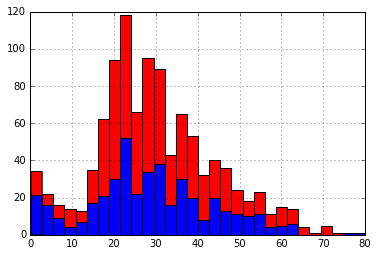

In [16]:
%matplotlib inline
supervivientes=titanic['survived']==1
no_supervivientes=titanic['survived']==0

titanic['age'].hist(bins=30, color='red')
titanic['age'][supervivientes].hist(bins=30, color='blue')

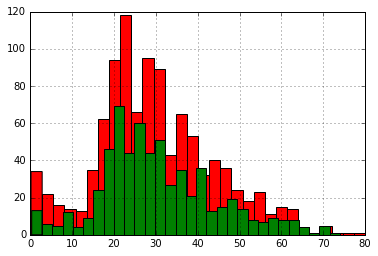

In [17]:
titanic['age'].hist(bins=30, color='red')
titanic['age'][no_supervivientes].hist(bins=30, color='green')

Por lo que observamos, en los histogramas de supervivientes y no supervivientes contra el total, podemos hacer tres grupos de edad: 0-16, 17-40, +40

In [18]:
titanic.loc[:, 'age_agr'] = titanic['age'].map(lambda x: '0-16' if x < 17 else '17-40' if x < 40 else '+40')

Vamos ahora a estudiar la variable far

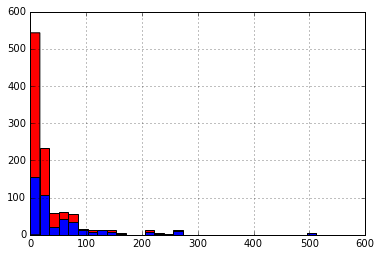

In [19]:
titanic['fare'].hist(bins=30, color='red')
titanic['fare'][supervivientes].hist(bins=30, color='blue')

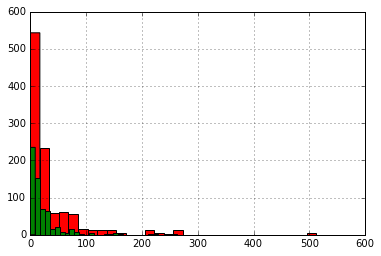

In [20]:
titanic['fare'].hist(bins=30, color='red')
titanic['fare'][no_supervivientes].hist(bins=30, color='green')

In [21]:
titanic.loc[:, 'fare_agr'] = titanic['fare'].map(lambda x: '<40' if x < 40 else '40-100' if x < 100 else '>100')

actualizamos el listado de variables y hacemos un dataset con todas las variables que vamos a utilizar en el modelo (ahora todas ellas categóricas).

In [22]:
var_categoricas = ['pclass','sex','age_agr','sibsp_agr','parch_agr','fare_agr','embarked']
titanic_varModel = titanic[['survived','pclass','sex','age_agr','sibsp_agr','parch_agr','fare_agr','embarked']].copy()
titanic_varModel.head()

,survived,pclass,sex,age_agr,sibsp_agr,parch_agr,fare_agr,embarked
0,1,1,female,17-40,0,0,>100,S
1,1,1,male,0-16,1,1_2_3,>100,S
2,0,1,female,0-16,1,1_2_3,>100,S
3,0,1,male,17-40,1,1_2_3,>100,S
4,0,1,female,17-40,1,1_2_3,>100,S


Como ya tenemos todas las variables categóricas, vamos a crear variables dummies por cada valor de cada variable. Dentro de las dummies de cada variable, eliminamos una, ya que esta variable se puede obtener del resto de dummies.

In [23]:
for var in var_categoricas:
    dummie = pd.get_dummies(titanic_varModel[var], prefix = var)
    names = list(dummie.columns)
    names.remove(names[0])
    titanic_varModel = pd.concat([titanic_varModel, dummie[names]], axis = 1)
    names = list(titanic_varModel.columns)
    names.remove(var)
    titanic_varModel = titanic_varModel[names]
    
titanic_varModel.head(5)

,survived,pclass_2,pclass_3,sex_male,age_agr_0-16,age_agr_17-40,sibsp_agr_1.0,sibsp_agr_2_3,sibsp_agr_4_5_8,parch_agr_1_2_3,parch_agr_4_5_6,fare_agr_<40,fare_agr_>100,embarked_Q,embarked_S
0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Ahora estudiamos el coeficiente VIF para ver si hay multicolinealidad. Este indicador nos muestra  cuánto se incrementa la varianza de un coeficiente de regresión estimado debido a la colinealidad. Se dice que es alto si supera el valor 5 o 10. En nuestro caso tomaremos como valor máximo 5 y eliminaremos cualquier variable que lo supere.

In [24]:
from sklearn.linear_model import LinearRegression

# Borrado de la variable objetivo
titanic_vif = titanic_varModel.copy(deep = True)
features = list(titanic_vif.columns)
features.remove('survived')
titanic_vif =titanic_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = titanic_vif[fet]
    y = titanic_vif[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print 'El valor del VIF para la variable', var, 'es:', vif

El valor del VIF para la variable pclass_2 es: 2.86287344288
El valor del VIF para la variable pclass_3 es: 3.69975567828
El valor del VIF para la variable sex_male es: 1.12313657035
El valor del VIF para la variable age_agr_0-16 es: 2.02262853755
El valor del VIF para la variable age_agr_17-40 es: 1.58421642263
El valor del VIF para la variable sibsp_agr_1.0 es: 1.26169230603
El valor del VIF para la variable sibsp_agr_2_3 es: 1.10880322137
El valor del VIF para la variable sibsp_agr_4_5_8 es: 1.35116332268
El valor del VIF para la variable parch_agr_1_2_3 es: 1.57735420674
El valor del VIF para la variable parch_agr_4_5_6 es: 1.07247481541
El valor del VIF para la variable fare_agr_<40 es: 2.65794450628
El valor del VIF para la variable fare_agr_>100 es: 1.47933081182
El valor del VIF para la variable embarked_Q es: 1.30819630141
El valor del VIF para la variable embarked_S es: 1.4257879916


Como ninguna es mayor de 5, no hay variables colineales y mantenemos todas para la generacion del modelo.

In [25]:
var_categoricas=features
var_categoricas

['pclass_2',
 'pclass_3',
 'sex_male',
 'age_agr_0-16',
 'age_agr_17-40',
 'sibsp_agr_1.0',
 'sibsp_agr_2_3',
 'sibsp_agr_4_5_8',
 'parch_agr_1_2_3',
 'parch_agr_4_5_6',
 'fare_agr_<40',
 'fare_agr_>100',
 'embarked_Q',
 'embarked_S']

A continuación calculamos el Information value (IV) para cada variable

In [26]:
%pylab
%matplotlib inline

from sklearn.linear_model.logistic import LogisticRegression
import pandas as pd

result_IV = []
titanic_IV = titanic_varModel.copy(deep=True)
var_target = titanic_IV['survived'] == 0

for v_cat in var_categoricas:
    var_target = array(var_target)
    var_values = array(titanic_varModel[v_cat])
    var_levels = unique(var_values)

    mat_values = numpy.zeros(shape=(len(var_levels),2))

    for i in range(len(var_target)):
        # Obtención de la posición en los niveles del valor
        for j in range(len(var_levels)):
            if var_levels[j] == var_values[i]:
                pos = j
                break

        # Estimación del número valores en cada nivel
        if var_target[i]:
            mat_values[pos][0] += 1
        else:
            mat_values[pos][1] += 1

        # Obtención del IV
        IV = 0
        for j in range(len(var_levels)):
            if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                IV += (rt - rf) * np.log(rt / rf)
        
    # Se agrega el IV al listado
    result_IV.append(IV)

for i in range(len(var_categoricas)):
    print "La variable", var_categoricas[i], "el IV es", result_IV[i]

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


La variable pclass_2 el IV es 0.112833168159
La variable pclass_3 el IV es 0.507856484462
La variable sex_male el IV es 1.35855179749
La variable age_agr_0-16 el IV es 0.12494911959
La variable age_agr_17-40 el IV es 0.127422240716
La variable sibsp_agr_1.0 el IV es 0.152218099715
La variable sibsp_agr_2_3 el IV es 0.116426815711
La variable sibsp_agr_4_5_8 el IV es 1.76788524539
La variable parch_agr_1_2_3 el IV es 0.247241457523
La variable parch_agr_4_5_6 el IV es 1.2430706937
La variable fare_agr_<40 el IV es 0.377424976614
La variable fare_agr_>100 el IV es 0.533310955061
La variable embarked_Q el IV es 0.558943056001
La variable embarked_S el IV es 0.190575417929


Eliminamos las variables que tienen un valor de IV menos de 0.5.

In [27]:
titanic_varModel = titanic_varModel[['survived','pclass_3','sex_male','sibsp_agr_4_5_8','parch_agr_4_5_6','fare_agr_>100','embarked_Q']]
titanic_varModel.head()

,survived,pclass_3,sex_male,sibsp_agr_4_5_8,parch_agr_4_5_6,fare_agr_>100,embarked_Q
0,1,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,1.0,0.0


Una vez que ya tenemos todas las variables que vamos a utilizar en el modelo de regresión logística separamos el dataset en dos. Uno de entrenamiento(70%) y otro de test(30%)

In [28]:

from sklearn.cross_validation import train_test_split
var_categoricas=['pclass_3','sex_male','sibsp_agr_4_5_8','parch_agr_4_5_6','fare_agr_>100','embarked_Q']
# Obtenemos las muestras de entrenamiento (80%) y prueba (20%)
x = titanic_varModel[var_categoricas]
y = titanic_varModel['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Cremoa una funcion que nos indicará distintas méstricas del modelo, para confirmar si el ajuste es bueno o no.

In [35]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred)
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)
    

In [36]:
classifier = LogisticRegression().fit(x_train, y_train)
y_pred     = classifier.predict(x_train)

In [38]:
confusion_matrix=[]
var_target = titanic_IV['survived']
metricas_modelos(y_pred, var_target)

ValueError: Found arrays with inconsistent numbers of samples: [ 731 1045]